In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle
import numpy as np

pd.options.display.max_rows = 100
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})



In [10]:
# path = r'/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results' # use your path
path = r'/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/run/compare_ml_accuracy'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    if "scale" in filename:
        try:
            df = pd.read_csv(filename, index_col=None, header=0)
        except:
            pass
        scale = filename.split("_scale_")[1].split("-")[0]
        df['params'] = scale
        if len(df)>25:
            li.append(df)

    

total_frame = pd.concat(li, axis=0, ignore_index=True)
total_frame


,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,params
0,0,320640.12,225978.71,23300.555309,29579.745224,3.154551e+03,165604.866874,8123.75,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.310822e+10,88.238660,1184.624683,14
1,1,217358.28,215733.20,23464.752699,29595.668288,3.122286e+03,165604.866874,1884.71,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,7.748916e+09,55.021662,930.146579,14
2,2,348199.74,200767.44,21601.843042,29224.130128,1.658946e+03,165604.866874,10240.29,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.632059e+10,90.543431,1190.412040,14
3,3,367045.20,204951.28,23278.203832,29656.706700,3.188160e+03,165604.866874,13192.97,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,3.368872e+10,110.783704,1243.998076,14
4,4,130810.56,149697.10,22191.845222,29595.668288,3.116601e+03,148459.399850,0.00,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.987232e+10,42.311670,599.579246,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187947,131,51744.00,0.00,39522.335807,24796.837395,1.112884e+06,642607.091627,0.00,0,493475.0,...,17596.2,6979.5,594449.8,58861.0,0.0,87.9,-3.354515e+12,14.080168,105.040320,19
187948,132,0.00,0.00,36449.976014,23361.991785,7.639124e+05,350453.788244,0.00,0,493475.0,...,17596.2,6979.5,594449.8,58861.0,0.0,87.9,-3.422734e+12,8.072219,0.000000,19
187949,133,19404.00,0.00,40286.339740,25307.207500,1.132297e+06,613167.160094,0.00,0,493475.0,...,17596.2,6979.5,594449.8,58861.0,0.0,87.9,-3.500507e+12,11.872933,39.390120,19
187950,134,0.00,0.00,38086.846504,23401.816574,8.313465e+05,301839.828842,0.00,0,493475.0,...,17596.2,6979.5,594449.8,58861.0,0.0,87.9,-3.604500e+12,7.303408,0.000000,19


In [11]:
# Visualising results
total_frame['params'] = pd.to_numeric(total_frame['params'])

In [12]:
mean_results = total_frame.groupby("params").mean().reset_index()
mean_results['params'] = pd.to_numeric(mean_results['params'])

Unnamed: 0


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


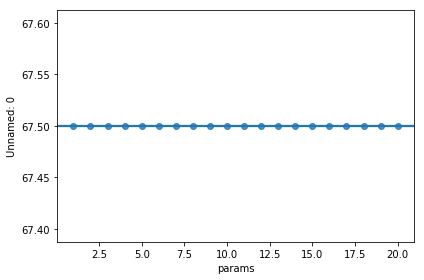

contributed_CCGT


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


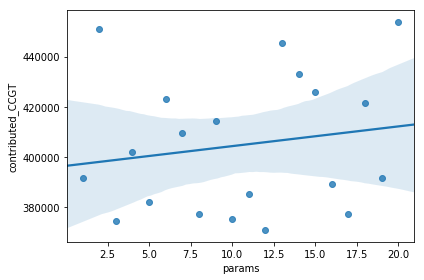

contributed_Coal


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


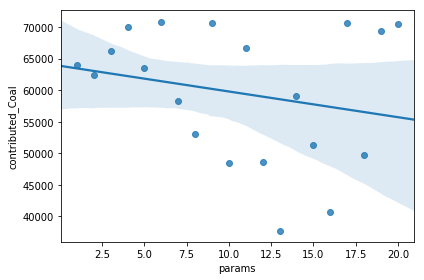

contributed_Onshore


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


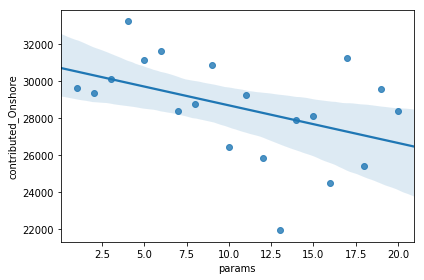

contributed_Offshore


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


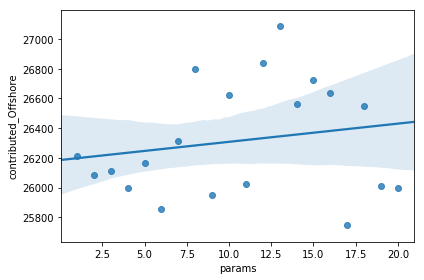

contributed_PV


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


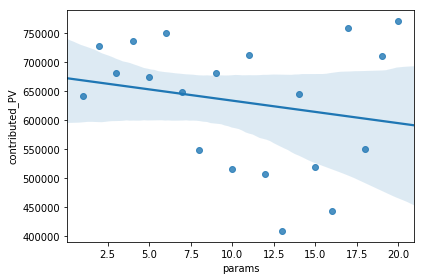

contributed_Nuclear


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


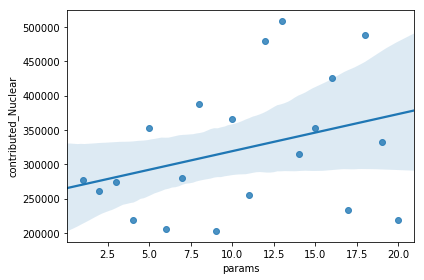

contributed_Recip_gas


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


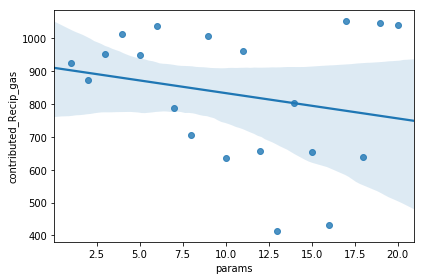

contributed_Biomass


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


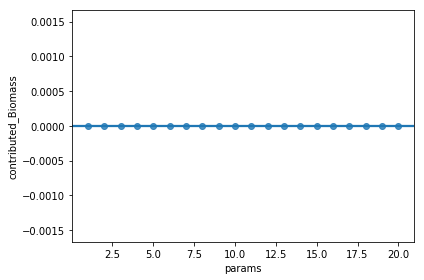

total_CCGT


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


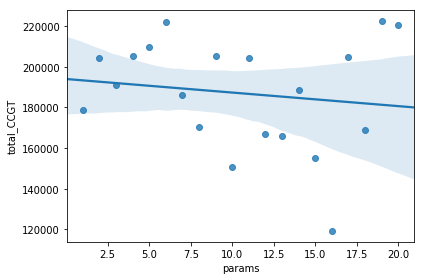

total_Coal


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


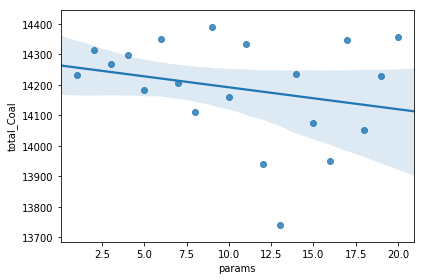

total_Onshore


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


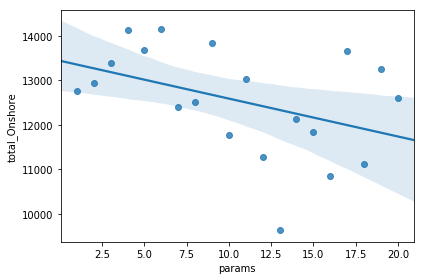

total_Offshore


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


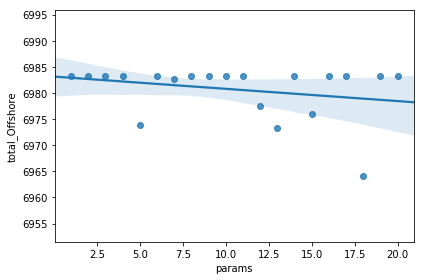

total_PV


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


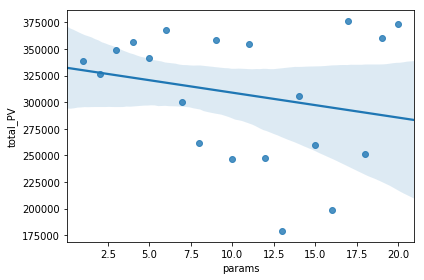

total_Nuclear


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


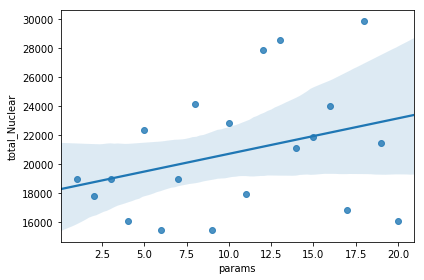

total_Recip_gas


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


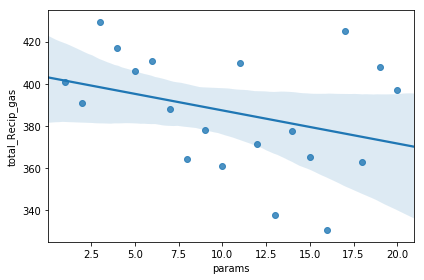

Carbon_tax


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


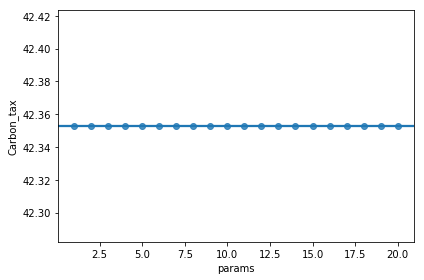

total_genco_wealth


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


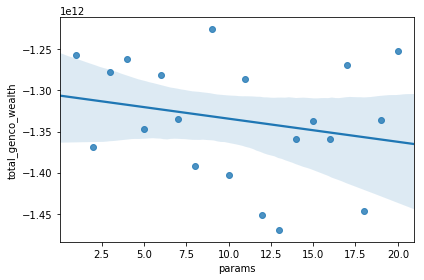

Electricity_cost


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


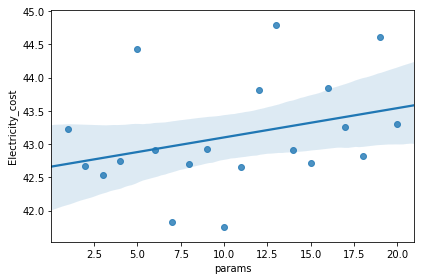

Carbon_emitted


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


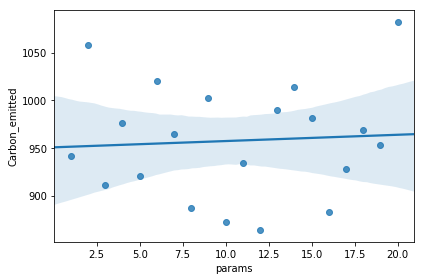

params


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


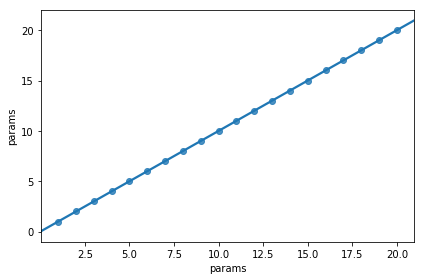

In [13]:
for column in total_frame.columns:
    print(column)
    sns.regplot(data=mean_results, x="params", y=column)
    plt.show()

In [14]:
mean_results.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/sensitivity_analysis/mean_results.csv")